<a href="https://colab.research.google.com/github/aqsa-isha/Encryptix-Movie-Rating-Prediction/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the dataset
data = pd.read_csv('/content/Movies_India.csv', encoding='ISO-8859-1')


In [3]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# First five rows of the dataset
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
# Description of dataset
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
# Check for missing values
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [8]:
data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre', 'Rating'],inplace=True)

In [9]:
data.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [10]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [11]:
# convert votes columns

data['Votes'] = data['Votes'].astype(str)
data['Votes'] = data['Votes'].str.replace(',', '', regex=False)  # Use regex=False for safety
data['Votes'] = data['Votes'].astype(int)


In [12]:
# convert year columns
data['Year'] = data['Year'].astype(str)

data['Year'] = data['Year'].str.replace('(', '').str.replace(')', '').astype(int)


In [13]:
# Remove min from Duration column
data['Duration'] = data['Duration'].str.replace('min', '', regex=False).str.strip()


In [14]:
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Fill NaN values with the median of the Duration column
data['Duration'] = data['Duration'].fillna(data['Duration'].median())

# Check the result
print(data['Duration'])


1        109.0
3        110.0
5        147.0
6        142.0
8         82.0
         ...  
15501    135.0
15503    125.0
15504    135.0
15505    129.0
15508    130.0
Name: Duration, Length: 7558, dtype: float64


In [15]:
# Again check for null values
data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [16]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


#### Exploratory Data Analysis

In [17]:
# Top 10 movies
top_movies = data.loc[data['Rating'].sort_values(ascending=False)[:10].index]
top_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93.0,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56.0,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90.0,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101.0,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97.0,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


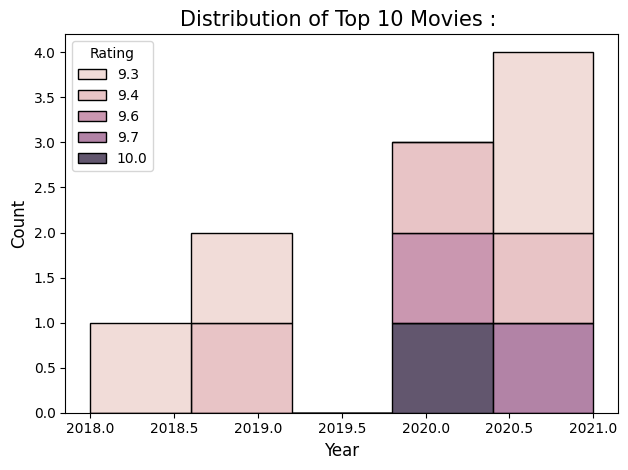

In [18]:
# Distribution of top 10 movies w.r.t Year
sns.histplot(data = top_movies, x = 'Year', hue = 'Rating', multiple= 'stack')
plt.title('Distribution of Top 10 Movies : ', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.tight_layout()
plt.show()

In [19]:
# distribution of Genre of Movies
genre_counts = data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291
...,...,...
411,"Family, Drama, Thriller",1
412,"Action, Musical, War",1
413,"Action, Fantasy, Horror",1
414,"Horror, Crime, Thriller",1


In [20]:
# Select top 5 genres
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291


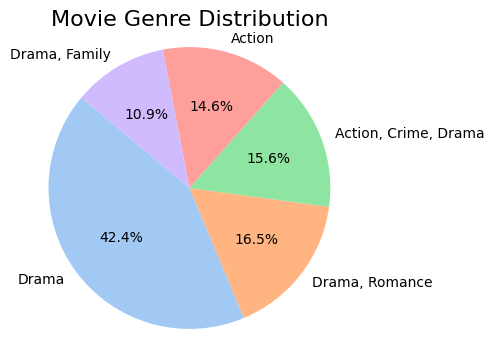

In [21]:
# Pie Chart of Movie Genre Distribution
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Movie Genre Distribution', fontsize=16)
plt.show()

In [22]:
# Distribution of top 5 ddirectors by average ratings
director_ratings = data.groupby('Director')['Rating'].mean().reset_index()
director_ratings = director_ratings.sort_values(by='Rating', ascending=False)
top_directors = director_ratings.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


<ipython-input-23-79b8a724ab69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Director', data = top_directors, palette='viridis')


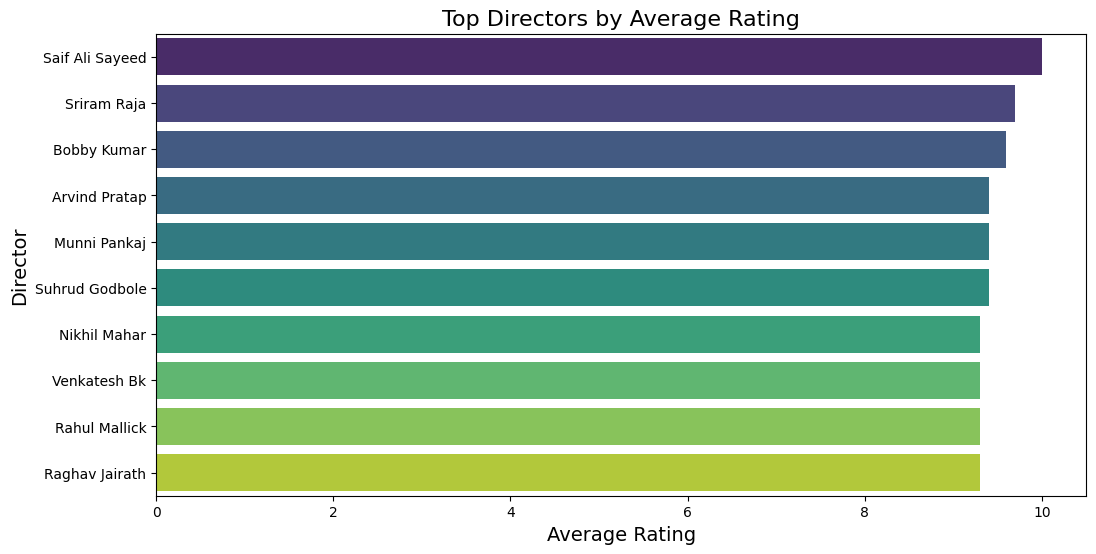

In [23]:
# Bar Plot of Top Directors by Average Rating
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Director', data = top_directors, palette='viridis')
plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.show()

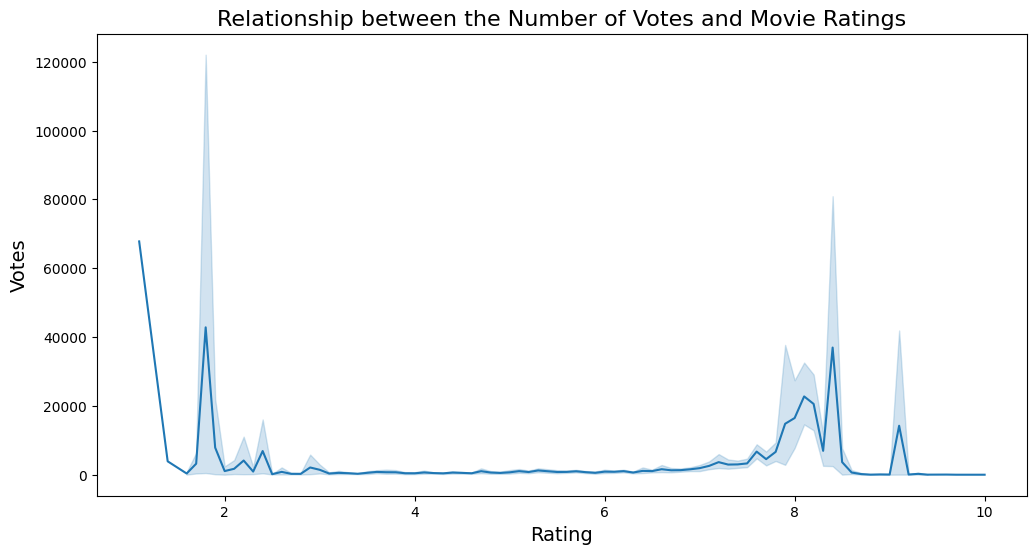

In [24]:
# Relationship between the number of votes and movie ratings
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Rating', y = 'Votes', data = data)
plt.title('Relationship between the Number of Votes and Movie Ratings', fontsize = 16)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Votes', fontsize = 14)
plt.show()


In [25]:
# Distribution of top actors by number of movies
actor_counts = data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


<ipython-input-26-db3e02802ffd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MovieCount', y='Actor', data=top_n_actors, orient='h', palette='viridis')


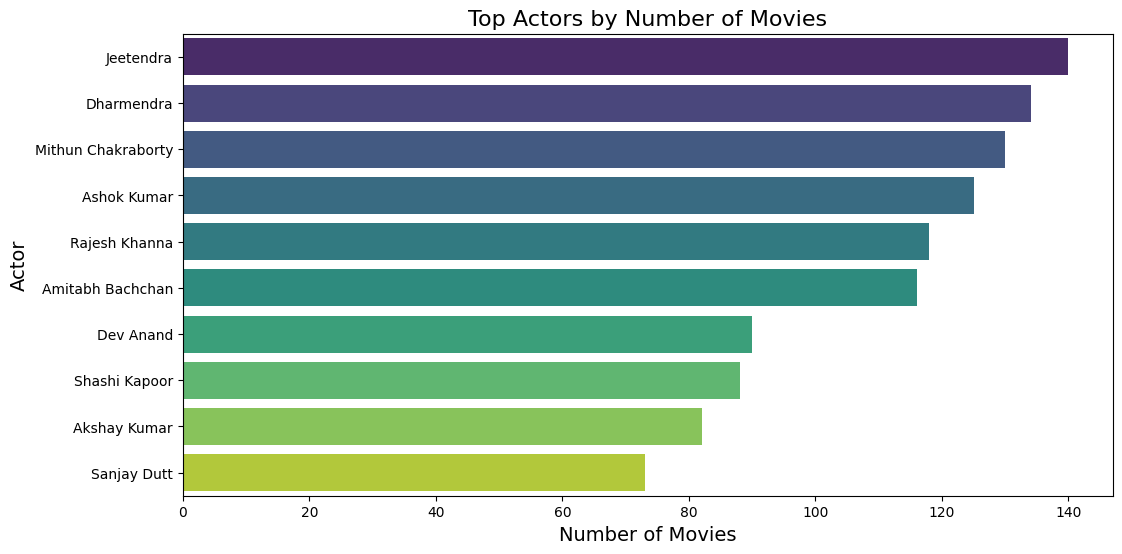

In [26]:
# Bar Plot pf Top Actors by Number of Movies
plt.figure(figsize=(12, 6))
sns.barplot(x='MovieCount', y='Actor', data=top_n_actors, orient='h', palette='viridis')
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.show()

In [27]:
# Distribution of number of movies released every year
yearly_movie_counts = data['Year'].value_counts().sort_index()
yearly_movie_counts = yearly_movie_counts.reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']
yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts


,Year,MovieCount
0,1917,1
1,1931,3
2,1932,2
3,1933,4
4,1934,2
...,...,...
87,2017,223
88,2018,214
89,2019,238
90,2020,157


Text(0, 0.5, 'Number of Movies')

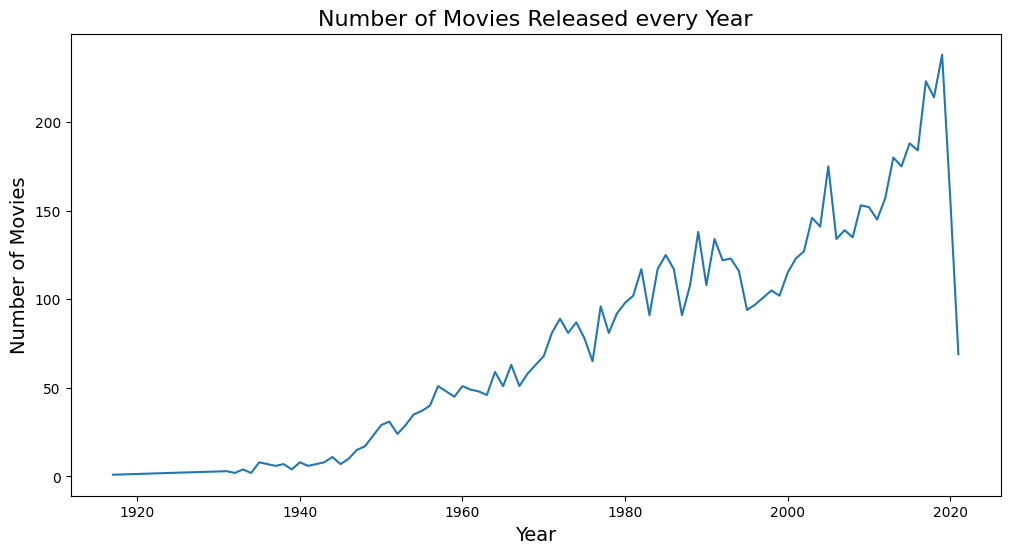

In [28]:
# Line Plot of Number of Movies Released every year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='MovieCount', data=yearly_movie_counts)
plt.title('Number of Movies Released every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

In [29]:
# Distribution of Movies with rating greater than 8 and votes greater than 10000
filtered_df = data[(data['Rating'] > 8) & (data['Votes'] > 10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104.0,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122.0,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160.0,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139.0,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130.0,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151.0,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186.0,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122.0,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143.0,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


<ipython-input-30-6d18d7d2d2e8>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')


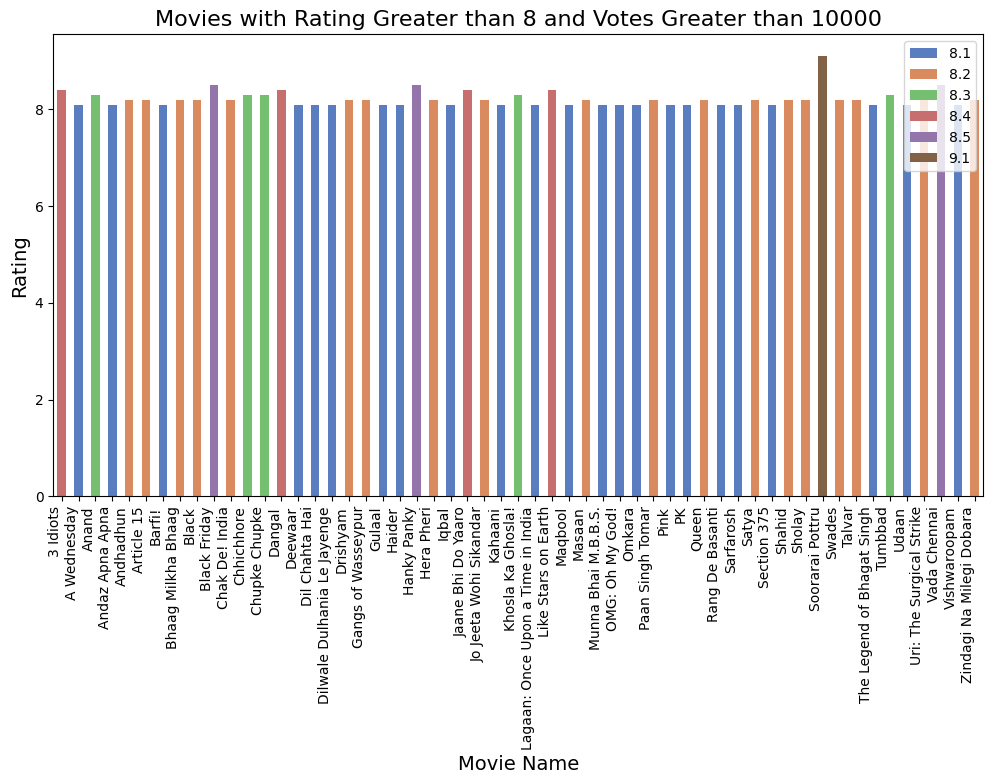

In [30]:
# Barplot of Movies with rating greater than 8 and votes greater than 10000
plt.figure(figsize=(12, 6))
axis = sns.barplot(x='Name', y='Rating', data=filtered_df, hue = 'Rating', dodge = False, width = 0.5, palette= 'muted')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
axis.legend(loc='upper right')
axis.set_xlabel('Movie Name', fontsize=14)
axis.set_ylabel('Rating', fontsize=14)
plt.title('Movies with Rating Greater than 8 and Votes Greater than 10000', fontsize=16)
plt.show()

In [31]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [32]:
# Distribution of Durations of movies by years
data['Duration'] = data['Duration'].astype(int)
data['Year'] = data['Year'].astype(int)

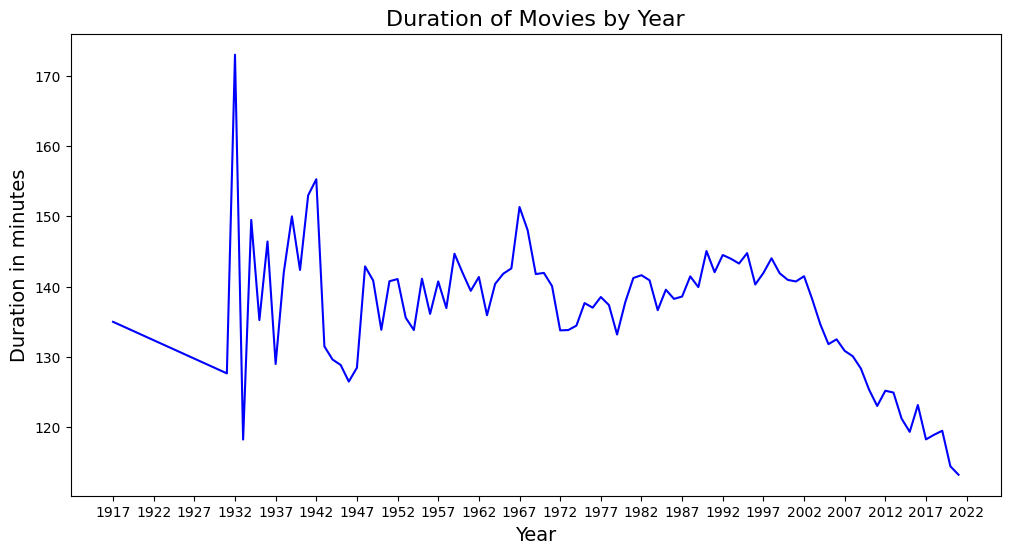

In [33]:
# Line Plot of Duration of Movies by Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Duration', data=data, color='blue', errorbar = None)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Duration in minutes', fontsize=14)
plt.title('Duration of Movies by Year', fontsize=16)
plt.xticks(np.arange(1917, 2023, 5))
plt.show()

In [34]:
# Distribution of Number of Movies each Genre
data['Genre'] = data['Genre'].str.split(',')

genre_dataframe = data.explode('Genre')
genre_dataframe

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


<ipython-input-35-f709141e221b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_dataframe, x='Genre', order=genre_dataframe['Genre'].value_counts().index, palette='viridis')


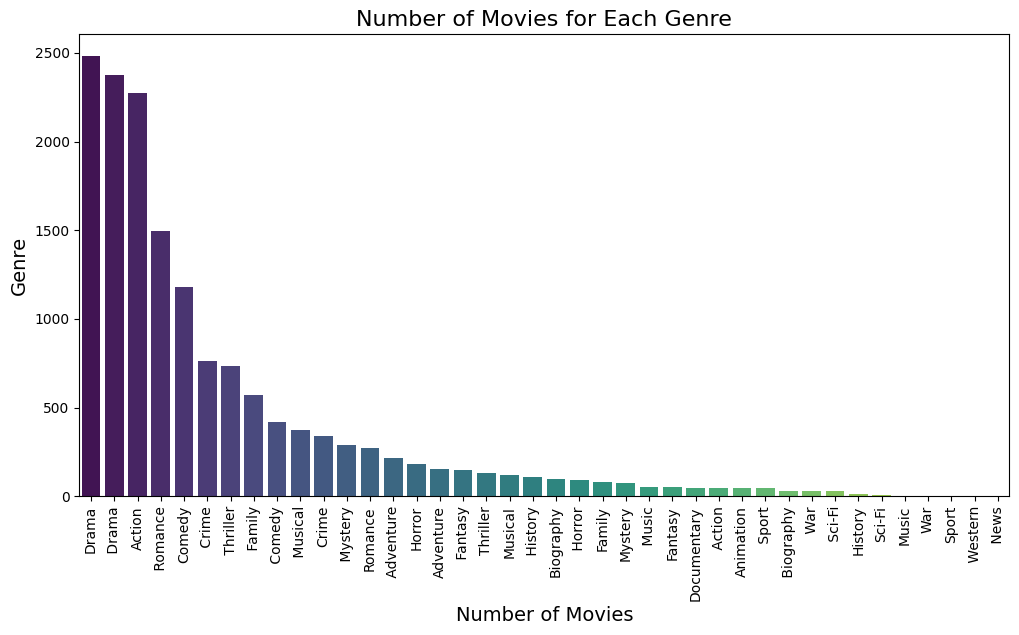

In [35]:
# Countplot of Number of Movies for each Genre
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_dataframe, x='Genre', order=genre_dataframe['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

In [36]:
# Distribution of Average Rating of Movies in each Genre
average_ratings_by_genre = genre_dataframe.groupby('Genre')['Rating'].mean().reset_index()
average_ratings_by_genre = average_ratings_by_genre.sort_values(by='Rating', ascending=False)
average_ratings_by_genre

,Genre,Rating
13,News,8.000000
26,Documentary,7.587755
32,Music,7.250000
2,Biography,6.845161
8,History,6.825234
23,Biography,6.676289
30,History,6.630769
36,Sci-Fi,6.460000
16,Sport,6.406667
29,Fantasy,6.246154


<ipython-input-37-44c97591aec0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Rating', data=average_ratings_by_genre, palette='coolwarm')


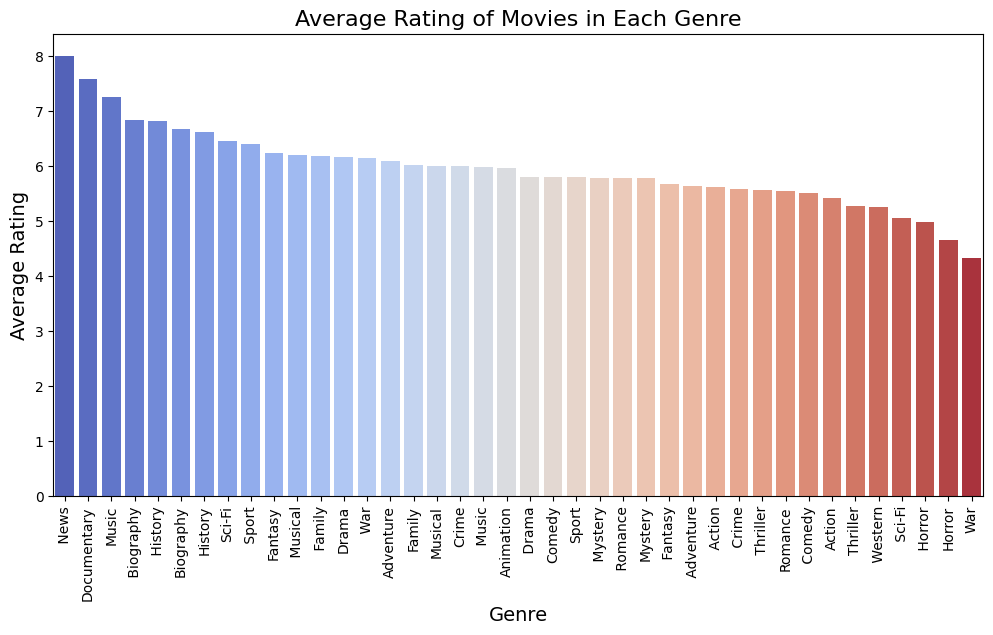

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Rating', data=average_ratings_by_genre, palette='coolwarm')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of Movies in Each Genre', fontsize=16)
plt.xticks(rotation = 90)
plt.show()

#### Feature Engineering

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Tranform data
trans_data = data.drop(['Name'], axis = 1)

# Tranform director columns
trans_data['Director'] = labelencoder.fit_transform(data['Director'])

# Tranform Actor columns
trans_data['Actor 1'] = labelencoder.fit_transform(data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(data['Actor 3'])
trans_data['Genre'] = labelencoder.fit_transform(data['Genre'].apply(lambda x: ', '.join(x)))

# Tranform Genre columns
trans_data['Genre'] = labelencoder.fit_transform(data['Genre'].apply(lambda x: ', '.join(x)))
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data, columns = trans_data.columns)
sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


In [40]:
# Correlation of Data
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

,Rating
Rating,1.000000
Votes,0.134655
Genre,0.122565
Actor 2,0.038852
Actor 3,0.031550
Actor 1,0.025089
Duration,-0.001801
Director,-0.003678
Year,-0.194990


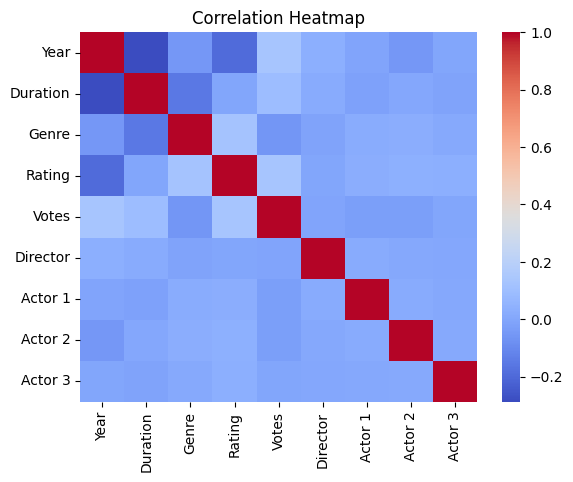

In [41]:
# Heat Map of Correlation
sns.heatmap(corr_df, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Model Building

In [42]:
# Import Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor



In [43]:
# put all data except Rating
X = trans_data.drop(['Rating'], axis = 1)
# put only Rating data
y = trans_data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [44]:
X_test = np.array(X_test)

In [45]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.38173569, 6.27438422, 6.24148256, ..., 5.6990634 , 6.25823896,
       6.09526622])

In [46]:
print('R2 Score : ', r2_score(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))

R2 Score :  0.0848334767203478
Mean Squared Error :  1.6972873264362005
Mean Absolute Error :  1.0286370452288052


In [47]:
print(y_test)

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
14566    3.5
10966    5.2
10168    2.7
14796    4.9
2785     8.0
Name: Rating, Length: 2268, dtype: float64
